# Data Generation


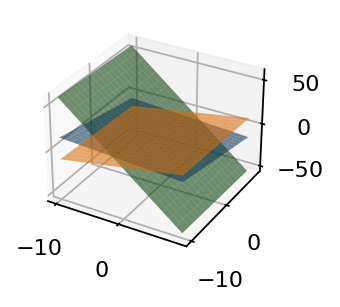

In [285]:
# https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def pltPlanesIn3D(norms=[], offsets=[], points=[], xyranges=[10, 10], alpha=0.6, title='', pltRow=False,figsize=(16,10),dpi=160):

    if not len(norms) == len(offsets):
        raise ValueError(
            'offset vector length should be equal to the norms length.')

    # Create the figure
    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Add an axes
    if not pltRow:
        ax = fig.add_subplot(111, projection='3d')
        for point_tensor in points:
            for point in point_tensor:
                # and plot the points
                ax.scatter(point[0], point[1], point[2])


    # Sample
    # print (max(norms),min(norms))
    xx, yy = np.meshgrid(range(-xyranges[0],xyranges[0]), range(-xyranges[1],xyranges[1]))

    for idx, normal in enumerate(norms):

        if pltRow:
            ax = plt.subplot(1, len(norms), idx+1, projection='3d')
            for point in points[idx]:
                ax.scatter(point[0], point[1], point[2])

        # a plane is a*x+b*y+c*z+d=0
        # [a,b,c] is the normal. Thus, we have to calculate
        a, b, c = normal

        d = offsets[idx]

        zz = (a * xx + b * yy + d) * -1. / c

        # plot the surfaces

        ax.plot_surface(xx, yy, zz, alpha=alpha)
    plt.title(title)
    plt.show()




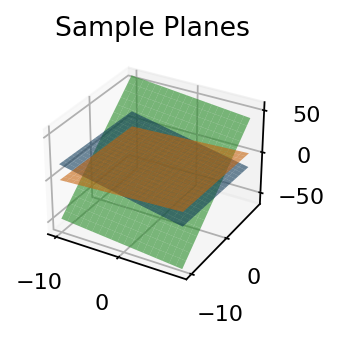

In [288]:
# produces random plane norm vectors in  a normal distribution 
def getRandom3DPlaneNorms(n, mean = 0, std = 1,offsets=False):
    return (torch.normal(mean,std,size=(n, 3),dtype=torch.double), torch.rand(size=(n, 1),dtype=torch.double)) if offsets \
        else (torch.normal(mean,std,size=(n, 3),dtype=torch.double), torch.zeros(n,1,dtype=torch.double))


pltPlanesIn3D(*getRandom3DPlaneNorms(3),figsize=(2,2),title='Sample Planes')

In [290]:
# gives samples of  a plane specifying the range, mean and standard deviation of the samples.
def sample3DPlane(n,norms,offsets,xyrange=[4,4],mean = 0, std = 1):
    pts = []
    for idx,norm in enumerate(norms):
        a,b,c = norm
        
        xx = (torch.normal(mean=mean,std=std,size=(n,),dtype=torch.double).T)*xyrange[0]
        yy = (torch.normal(mean=mean,std=std,size=(n,),dtype=torch.double).T)*xyrange[1]
        zz = (a * xx + b * yy + offsets[idx]) * -1. / c
        pts.append(torch.column_stack((xx,yy,zz)))
    return torch.stack(pts)

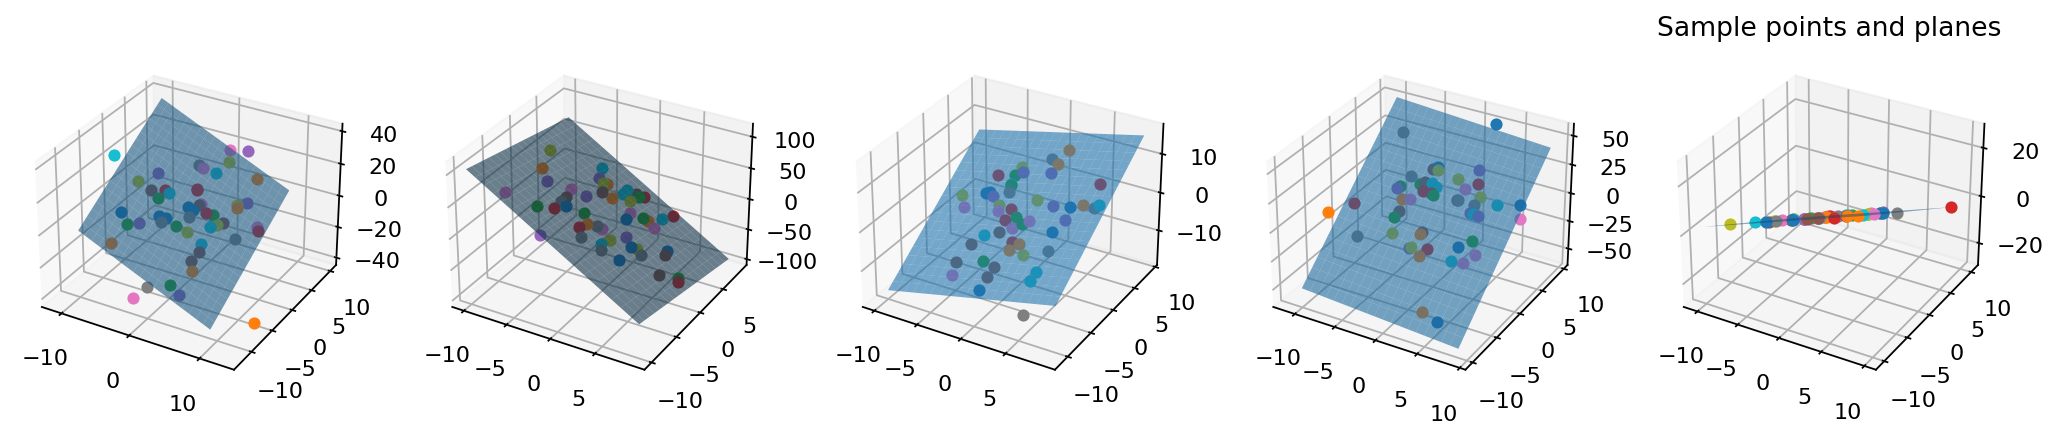

=>Evaluating projection vector
	 All points lay within the corresponding planes. E <= 1e-14


In [291]:


n_planes = 5
n_samples = 50

norm,offset = getRandom3DPlaneNorms(n_planes)
points = sample3DPlane(n_samples,norm,offset)


pltPlanesIn3D(norm,offset,points,pltRow=True,title='Sample points and planes')


epsilon = 1e-14
print('=>Evaluating projection vector')
for idx in range(n_planes):
    assert all(torch.matmul(points[idx],norm[idx])<=epsilon) ;f"Error in generated points for plane {idx}. Generated points doesnot lay withing the plane."

print(f'\t All points lay within the corresponding planes. E <= {epsilon}')

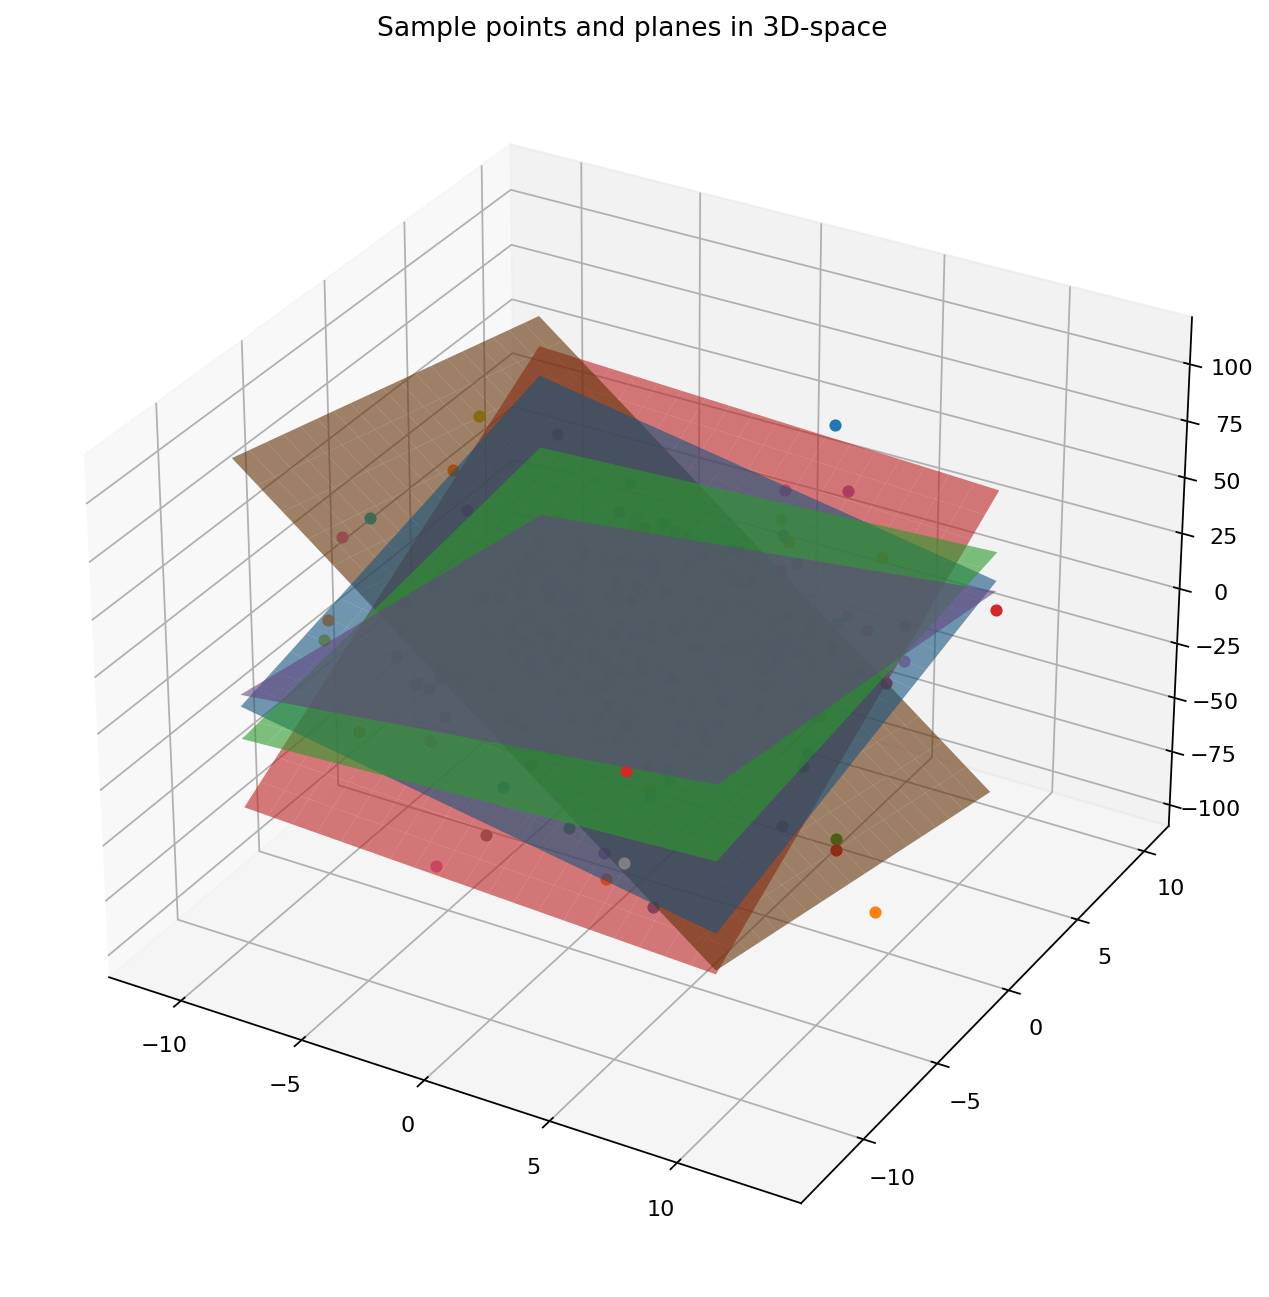

In [292]:
pltPlanesIn3D(norm,offset,points,title='Sample points and planes in 3D-space')

* having a continuce space we are supposed to estimate a specific plane given the points
* what do we expect from out nerual net? a continuous 3-variable functional?     

In [293]:
print(f'Data dimentions  n_planes = {n_planes} and foreach plane n_samples = {n_planes}')

print('_'*60)
print('\t','Size',sep='\t|')
print('planes\t',list(norm.size()),sep='\t|')
print('plane samples',list(points.size()),sep='\t|')


Data dimentions  n_planes = 5 and foreach plane n_samples = 5
____________________________________________________________
		|Size
planes		|[5, 3]
plane samples	|[5, 50, 3]
